# Cargar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Carga de datos

Debido al tamaño de la data y al formato en que se encontraba, esta se dividio en tres partes

In [2]:
# Wilmer
# Dfe1 = pd.read_excel('C:/Users/Wilmer/Documents/DIPLOMADO/AnalisisDeDatos/env/Aprendizaje Supervisado Avanzado eafir/MLEst/Datasets/Notas_estudiantes_1.xlsx')
# Dfe2 = pd.read_excel('C:/Users/Wilmer/Documents/DIPLOMADO/AnalisisDeDatos/env/Aprendizaje Supervisado Avanzado eafir/MLEst/Datasets/Notas_estudiantes_2.xlsx')
# Dfe3 = pd.read_excel('C:/Users/Wilmer/Documents/DIPLOMADO/AnalisisDeDatos/env/Aprendizaje Supervisado Avanzado eafir/MLEst/Datasets/Notas_estudiantes_3.xlsx')
data = pd.read_excel('C:/Users/Wilmer/Documents/DIPLOMADO/AnalisisDeDatos/env/Aprendizaje Supervisado Avanzado eafir/MLEst/Datasets/data_matematicas.xlsx')
name_program = pd.read_excel('C:/Users/Wilmer/Documents/DIPLOMADO/AnalisisDeDatos/env/Aprendizaje Supervisado Avanzado eafir/MLEst/Datasets/name_program.xlsx')

In [3]:
# Verificar el numero de filas

total_shape=data.shape[0]#+Dfe2.shape[0]+Dfe3.shape[0]
print("{:,}".format(total_shape))

10,762


Como los datos vienen divididos en tres partes, en el siguiente paso se concatenan para trabajar bajo una sola data

In [4]:
Dfe = data #pd.concat([Dfe1, Dfe2,Dfe3],ignore_index=True, axis=0)
Dfe = Dfe.reset_index(drop = True)

In [5]:
Dfe.head()

,Id_estudiante,Tipo_Documento,N_Documento,Estudiante,Periodo,Facultad,Departamento,Programa,Id_Asignatura,Asignatura,Grupo_Asignatura,Nota_Final,Fuente_Datos,Programa2,Circunscripcion,Genero,Estado_Civil,Estrato,Departamento3,Ciudad,Caracter,Enfasis,Periodos_Cursados,Acceso_Internet,Portatil_PC,Celular_Tablet,Grupo_Etnico,Con_Discapac,Capac_Excep,Poblac_Vulner,Orientac_Sex,Desvin_Grup_Arm,Inmigrante,Embarazada,Tiene_Hijos,Soltera_Cab_Fam,Consume_Sustan
0,P000053382,CC,1.063727e+09,Alberth Antonio Silgado Ballesta,2016-1,Facultad de Ciencias Básicas,Departamento De Matemáticas Y Estadístic,Matematicas,408251,Seminario de Proyecto de Grado,G1,4.5,MATRICULADO,MATEMÁTICAS,REGULAR,MASCULINO,SOLTERO(A),1,CÓRDOBA,MOÑITOS,PUBLICA,OTRO,12,NO,NO,NO,NO PERTENECE,NO,NO REPORTA,NO REPORTA,NO SE IDENTIFICA,NO,NO,NO,NO,NO,NO
1,P000053382,CC,1.063727e+09,Alberth Antonio Silgado Ballesta,2016-1,Facultad de Ciencias Básicas,Departamento De Matemáticas Y Estadístic,Matematicas,ec408202,ANALISIS FUNCIONAL II,G01,4.7,MATRICULADO,MATEMÁTICAS,REGULAR,MASCULINO,SOLTERO(A),1,CÓRDOBA,MOÑITOS,PUBLICA,OTRO,12,NO,NO,NO,NO PERTENECE,NO,NO REPORTA,NO REPORTA,NO SE IDENTIFICA,NO,NO,NO,NO,NO,NO
2,P000053382,CC,1.063727e+09,Alberth Antonio Silgado Ballesta,2016-1,Facultad de Ciencias Básicas,Departamento De Matemáticas Y Estadístic,Matematicas,EP408067,Método de Elementos Finitos,G1,4.3,MATRICULADO,MATEMÁTICAS,REGULAR,MASCULINO,SOLTERO(A),1,CÓRDOBA,MOÑITOS,PUBLICA,OTRO,12,NO,NO,NO,NO PERTENECE,NO,NO REPORTA,NO REPORTA,NO SE IDENTIFICA,NO,NO,NO,NO,NO,NO
3,P000053382,CC,1.063727e+09,Alberth Antonio Silgado Ballesta,2016-1,Facultad de Ciencias Básicas,Departamento De Matemáticas Y Estadístic,Matematicas,EP408148,ALGEBRA LINEAL AVANZADA,G1,4.1,MATRICULADO,MATEMÁTICAS,REGULAR,MASCULINO,SOLTERO(A),1,CÓRDOBA,MOÑITOS,PUBLICA,OTRO,12,NO,NO,NO,NO PERTENECE,NO,NO REPORTA,NO REPORTA,NO SE IDENTIFICA,NO,NO,NO,NO,NO,NO
4,P000002434,CC,1.193235e+09,Aldair Enrique Ruiz Banquett,2016-1,Facultad de Ciencias Básicas,Departamento De Matemáticas Y Estadístic,Matematicas,408223,ESTADISTICA II,G1,3.8,MATRICULADO,MATEMÁTICAS,REGULAR,MASCULINO,SOLTERO(A),1,CÓRDOBA,MONTERÍA,PUBLICA,OTRO,14,NO,NO,NO,NO PERTENECE,NO,NO REPORTA,NO REPORTA,NO SE IDENTIFICA,NO,NO,NO,NO,NO,NO


In [6]:
Dfe.columns

Index(['Id_estudiante', 'Tipo_Documento', 'N_Documento', 'Estudiante',
       'Periodo', 'Facultad', 'Departamento', 'Programa', 'Id_Asignatura',
       'Asignatura', 'Grupo_Asignatura', 'Nota_Final', 'Fuente_Datos',
       'Programa2', 'Circunscripcion', 'Genero', 'Estado_Civil', 'Estrato',
       'Departamento3', 'Ciudad', 'Caracter', 'Enfasis', 'Periodos_Cursados',
       'Acceso_Internet', 'Portatil_PC', 'Celular_Tablet', 'Grupo_Etnico',
       'Con_Discapac', 'Capac_Excep', 'Poblac_Vulner', 'Orientac_Sex',
       'Desvin_Grup_Arm', 'Inmigrante', 'Embarazada', 'Tiene_Hijos',
       'Soltera_Cab_Fam', 'Consume_Sustan'],
      dtype='object')

# Exploración y Transformación de los datos

Se reemplaza los nombres de los campos con una estructura adecuada

In [7]:
Dfe.columns = ['Id_estudiante', 'Tipo_Documento', 'N_Documento', 'Estudiante',
       'Periodo', 'Facultad', 'Dpto_prgm', 'Programa_asig', 'Id_Asignatura',
       'Asignatura', 'Grupo_Asignatura', 'Nota_Final', 'Fuente_Datos',
       'Programa_est', 'Circunscripcion', 'Genero', 'Estado_Civil', 'Estrato',
       'Depart', 'Ciudad','Caracter', 'Enfasis',
       'Perio_Cursados', 'Acceso_Internet', 'Portatil_PC', 'Celular_Tablet',
       'Grupo_Etnico', 'Con_Discapac', 'Capac_Excep', 'Poblac_Vulner',
       'Orientac_Sex', 'Desvin_Grup_Arm', 'Inmigrante', 'Embarazada',
       'Tiene_Hijos', 'Soltera_Cab_Fam', 'Consume_Sustan']


El campo "Programa_asig" posee un nombre muy largo para cada uno de los programas, asi que con el efecto de mejorar visualmente la lectura de estos datos se reemplazo cada uno de ellos con un nobre mas corto.

In [8]:
valores = name_program[['HomEstudentCompresed','Notas']]
valores.set_index('Notas', inplace=True)

dictionario = valores.to_dict()

Dfe['Programa_asig'] = Dfe['Programa_asig'].map(dictionario['HomEstudentCompresed'],na_action=None)


Se le da un breve vistaso a cada uno de los campos de la data

In [9]:
Dfe.describe()

,N_Documento,Nota_Final,Estrato
count,1.076200e+04,10679.000000,10762.000000
mean,2.350089e+09,3.336464,1.086973
std,1.122165e+10,0.917989,0.281808
min,1.077252e+07,0.000000,1.000000
25%,1.003435e+09,2.900000,1.000000
50%,1.062955e+09,3.400000,1.000000
75%,1.067965e+09,4.000000,1.000000
max,9.906132e+10,5.000000,2.000000


In [10]:
Dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10762 entries, 0 to 10761
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id_estudiante     10762 non-null  object 
 1   Tipo_Documento    10762 non-null  object 
 2   N_Documento       10762 non-null  float64
 3   Estudiante        10762 non-null  object 
 4   Periodo           10762 non-null  object 
 5   Facultad          10762 non-null  object 
 6   Dpto_prgm         10762 non-null  object 
 7   Programa_asig     10762 non-null  object 
 8   Id_Asignatura     10762 non-null  object 
 9   Asignatura        10762 non-null  object 
 10  Grupo_Asignatura  10762 non-null  object 
 11  Nota_Final        10679 non-null  float64
 12  Fuente_Datos      10762 non-null  object 
 13  Programa_est      10762 non-null  object 
 14  Circunscripcion   10762 non-null  object 
 15  Genero            10762 non-null  object 
 16  Estado_Civil      10762 non-null  object

In [11]:
Dfe.columns

Index(['Id_estudiante', 'Tipo_Documento', 'N_Documento', 'Estudiante',
       'Periodo', 'Facultad', 'Dpto_prgm', 'Programa_asig', 'Id_Asignatura',
       'Asignatura', 'Grupo_Asignatura', 'Nota_Final', 'Fuente_Datos',
       'Programa_est', 'Circunscripcion', 'Genero', 'Estado_Civil', 'Estrato',
       'Depart', 'Ciudad', 'Caracter', 'Enfasis', 'Perio_Cursados',
       'Acceso_Internet', 'Portatil_PC', 'Celular_Tablet', 'Grupo_Etnico',
       'Con_Discapac', 'Capac_Excep', 'Poblac_Vulner', 'Orientac_Sex',
       'Desvin_Grup_Arm', 'Inmigrante', 'Embarazada', 'Tiene_Hijos',
       'Soltera_Cab_Fam', 'Consume_Sustan'],
      dtype='object')

Se elimina los campos que no aportan valor al modelo

In [12]:

Dfe.drop(['Periodo','Fuente_Datos','Id_estudiante','Tipo_Documento','N_Documento','Estudiante','Facultad','Dpto_prgm','Id_Asignatura','Grupo_Asignatura','Perio_Cursados','Capac_Excep', 'Poblac_Vulner'],axis=1, inplace=True)


In [13]:
Dfe['Programa_asig'].unique()

array(['MATEMATICAS'], dtype=object)

Se verifica la cantidad de nulos existentes por cada campo

In [14]:
Dfe.isnull().sum()

Programa_asig       0
Asignatura          0
Nota_Final         83
Programa_est        0
Circunscripcion     0
Genero              0
Estado_Civil        0
Estrato             0
Depart              0
Ciudad              0
Caracter            0
Enfasis             0
Acceso_Internet     0
Portatil_PC         0
Celular_Tablet      0
Grupo_Etnico        0
Con_Discapac        0
Orientac_Sex        0
Desvin_Grup_Arm     0
Inmigrante          0
Embarazada          0
Tiene_Hijos         0
Soltera_Cab_Fam     0
Consume_Sustan      0
dtype: int64

# Se analizan los nulos dentro de cada campo

Campo "Asignatura" y "Nota Final"

como el numero de registros con valor nulo en el campo "Asignatura" es pequeño en comparacion con el tamaño de la data, se decide eliminarlos, y como no se tine una nota final para ciertos registros y com esta es de vital importancia para el modelo no se realiza un tramatamiento para encontrar un dato por lo que se decide eliminar de igual forma

In [15]:
Dfe.dropna(inplace=True)

Ademas de analizar los datos nulos, se notó que el proveedor de los datos al momento de realizar la exportación convertia los nulos en una categoria llamada "NO REPORTA" O "NO REPORTADO", es por ello que se hizo necesario verificar el numero de veces que aparecia esta categoria.

In [16]:
df_cant_nr = Dfe.isin(['NO REPORTA','NO REPORTADO'])
df_cant_nr.sum()

Programa_asig      0
Asignatura         0
Nota_Final         0
Programa_est       0
Circunscripcion    0
Genero             0
Estado_Civil       0
Estrato            0
Depart             0
Ciudad             0
Caracter           0
Enfasis            0
Acceso_Internet    0
Portatil_PC        0
Celular_Tablet     0
Grupo_Etnico       0
Con_Discapac       0
Orientac_Sex       0
Desvin_Grup_Arm    0
Inmigrante         0
Embarazada         0
Tiene_Hijos        0
Soltera_Cab_Fam    0
Consume_Sustan     0
dtype: int64

# Se analizan los campos con datos "NO REPORTA" Y "NO REPORTADO"

**Se trata el campo "Genero"**

In [17]:
Dfe.loc[Dfe['Genero'] == 'NO REPORTA']

,Programa_asig,Asignatura,Nota_Final,Programa_est,Circunscripcion,Genero,Estado_Civil,Estrato,Depart,Ciudad,Caracter,Enfasis,Acceso_Internet,Portatil_PC,Celular_Tablet,Grupo_Etnico,Con_Discapac,Orientac_Sex,Desvin_Grup_Arm,Inmigrante,Embarazada,Tiene_Hijos,Soltera_Cab_Fam,Consume_Sustan


Se notó que los registros pertenecen a una mujer por lo que se colocara el genero femenino, hay que aclarar que el nombre de un estudinate es un dato sencible por lo que en la data original no se mostrara.

In [18]:
Dfe['Genero'].replace({"NO REPORTA": 'FEMENINO'}, inplace=True)

**Se trata el campo "Estado_Civil"**

Se grafican los datos con respecto a estado civil, ademas se busca la categoria con mayor frecuencia y esta se le asignara a los registros que tienen valor "NO REPORTA" O "NO REPORTADO"

Columna Estado Civil


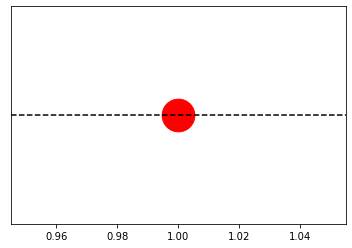

In [19]:
#Estado_Civil
df_es = Dfe.copy()

df_esn = pd.DataFrame(df_es.Estado_Civil.isin(['NO REPORTA','NO REPORTADO']))
df_esn = df_esn.replace({True: False,False: True})
#df_cn.groupby('Ciudad').size()

es_unique, countses = np.unique(df_esn.Estado_Civil, return_counts=True)

es_unique = np.sort(es_unique)[::-1]
sizeses = np.sort(countses)[::-1]
sizeses[0] = sizeses[0]/10
colorses = ['blue']*len(es_unique)
colorses[-1] = 'red'
#print(es_unique,'\n',sizeses)

print("Columna Estado Civil")
#print(sizeses[1]/sizeses[0]*100)

plt.axhline(1, color='k', linestyle='--')
plt.scatter(es_unique, np.ones(len(es_unique)), s=sizeses, color=colorses)
plt.yticks([])
plt.show()

In [20]:
Estado_Civil = Dfe.groupby(Dfe.Estado_Civil).size().sort_values(ascending=False)
Estado_Civil = round((Estado_Civil/Dfe.shape[0])*100,2)
Estado_Civil.head(10)

Estado_Civil
SOLTERO(A)     97.86
UNIÓN LIBRE     1.23
CASADO(A)       0.92
dtype: float64

Se Nota que el estado civil mas frecuente es el "SOLTERO(A)" con un 95% de todos los datos, es asi como los valores en cuestion se reemplazan por esta categoria

In [21]:
Dfe['Estado_Civil'].replace({"NO REPORTA": 'SOLTERO(A)',"NO REPORTADO": 'SOLTERO(A)', 'Soltero(a)':'SOLTERO(A)'}, inplace=True)

**Se trata el campo "Estrato"**

Para el estrato se realiza el mismo procedimiento que para el Estado_Civil

Columna Estrato


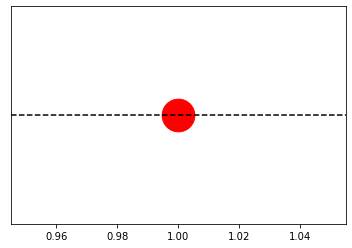

In [22]:
#Estrato
df_e = Dfe.copy()

df_cne = pd.DataFrame(df_e.Estrato.isin(['NO REPORTA','NO REPORTADO']))
df_cne = df_cne.replace({True: False,False: True})
#df_cn.groupby('Ciudad').size()

estrato_unique, counts_e = np.unique(df_cne.Estrato, return_counts=True)

estrato_unique = np.sort(estrato_unique)[::-1]
sizese = np.sort(counts_e)[::-1]
sizese[0] = sizese[0]/10
colorse = ['blue']*len(estrato_unique)
colorse[-1] = 'red'

print("Columna Estrato")

plt.axhline(1, color='k', linestyle='--')
plt.scatter(estrato_unique, np.ones(len(estrato_unique)), s=sizese, color=colorse)
plt.yticks([])
plt.show()

In [23]:
Estrato = Dfe.groupby(Dfe.Estrato).size().sort_values(ascending=False)
Estrato = round((Estrato/Dfe.shape[0])*100,2)
Estrato.head(10)

Estrato
1    91.35
2     8.65
dtype: float64

In [24]:
Dfe['Estrato'].replace({"NO REPORTA": 1,"NO REPORTADO": 1}, inplace=True)

**Se trata el campo "Depart"**

Aqui se busca la ciudad del departamento que no tiene un registro correcto

In [25]:
Dfe[Dfe['Depart']=='NO REPORTA']

,Programa_asig,Asignatura,Nota_Final,Programa_est,Circunscripcion,Genero,Estado_Civil,Estrato,Depart,Ciudad,Caracter,Enfasis,Acceso_Internet,Portatil_PC,Celular_Tablet,Grupo_Etnico,Con_Discapac,Orientac_Sex,Desvin_Grup_Arm,Inmigrante,Embarazada,Tiene_Hijos,Soltera_Cab_Fam,Consume_Sustan


Se nota que la ciudad es santa Marta por lo que el departamento buscado es el Magdalena

In [26]:
Dfe['Depart'].replace({"NO REPORTA": 'MAGDALENA','CÓRDOBA':"MAGDALENA"}, inplace=True)

**Se trata el campo "Ciudad"**

Se grafican los datos relacionados al Campo ciudad y se calcula la cantidad de registros clasificados por ciudad con el fin de obtener la categoria mas frecuente

Columna ciudad


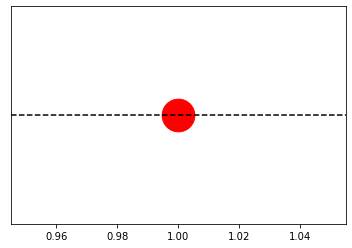

In [27]:
#Ciudad
df_c = Dfe.copy()

df_cn = pd.DataFrame(df_c.Ciudad.isin(['NO REPORTA','NO REPORTADO']))
df_cn = df_cn.replace({True: False,False: True})
#df_cn.groupby('Ciudad').size()

ciudad_unique, counts = np.unique(df_cn.Ciudad, return_counts=True)

ciudad_unique = np.sort(ciudad_unique)[::-1]
sizes = np.sort(counts)[::-1]
sizes[0] = sizes[0]/10
colors = ['blue']*len(ciudad_unique)
colors[-1] = 'red'
#print(ciudad_unique)

print("Columna ciudad")

plt.axhline(1, color='k', linestyle='--')
plt.scatter(ciudad_unique, np.ones(len(ciudad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

In [28]:
# Dfe['Ciudad'].unique()
data_ciudad = Dfe.groupby(Dfe.Ciudad).size().sort_values(ascending=False)
data_ciudad = round((data_ciudad/Dfe.shape[0])*100,2)
data_ciudad.head(10)

Ciudad
MONTERÍA                   33.12
LORICA                      9.04
CERETÉ                      8.63
PLANETA RICA                5.27
SAN PELAYO                  4.25
SAHAGÚN                     3.63
SAN BERNARDO DEL VIENTO     2.81
TIERRALTA                   2.43
BOGOTÁ D.C.                 1.92
VALENCIA                    1.90
dtype: float64

Como la categoria mas frecuente es la ciudad de Monteria representada con un 39% de los datos, el cual esta muy por encima de las cantidades del resto de las ciudades. Se decide asignar a los datos "NO REPORTA" por dicha ciudad de mas frecuencia.

In [29]:
Dfe['Ciudad'].replace({"NO REPORTA": 'MONTERÍA',"NO REPORTADO": 'MONTERÍA'}, inplace=True)

Una ves limpiado la data, verifivcamos el comportamiento de las variables numericas tales como la noa final de cada periodo de cada estudiantes

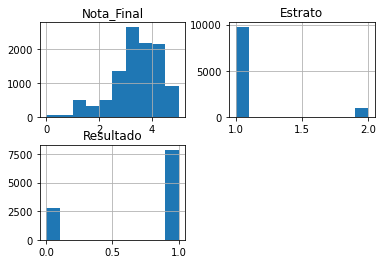

In [115]:
Dfe.hist()
plt.show()

Se alcanza a notar que la mayor concentracion de los resultaodos se encuntran entre las notas de 3 y 4.5, sin embargo la cantidad de estudiantes con notas por debajo de 3 tambien representa una cantidad signicativa a simple vista

# Crear nuevo campo a partir de un campo existente

In [31]:
Dfe['Resultado']=np.where(Dfe['Nota_Final']>=3,1,0)

In [32]:
Dfe

,Programa_asig,Asignatura,Nota_Final,Programa_est,Circunscripcion,Genero,Estado_Civil,Estrato,Depart,Ciudad,Caracter,Enfasis,Acceso_Internet,Portatil_PC,Celular_Tablet,Grupo_Etnico,Con_Discapac,Orientac_Sex,Desvin_Grup_Arm,Inmigrante,Embarazada,Tiene_Hijos,Soltera_Cab_Fam,Consume_Sustan,Resultado
0,MATEMATICAS,Seminario de Proyecto de Grado,4.5,MATEMÁTICAS,REGULAR,MASCULINO,SOLTERO(A),1,MAGDALENA,MOÑITOS,PUBLICA,OTRO,NO,NO,NO,NO PERTENECE,NO,NO SE IDENTIFICA,NO,NO,NO,NO,NO,NO,1
1,MATEMATICAS,ANALISIS FUNCIONAL II,4.7,MATEMÁTICAS,REGULAR,MASCULINO,SOLTERO(A),1,MAGDALENA,MOÑITOS,PUBLICA,OTRO,NO,NO,NO,NO PERTENECE,NO,NO SE IDENTIFICA,NO,NO,NO,NO,NO,NO,1
2,MATEMATICAS,Método de Elementos Finitos,4.3,MATEMÁTICAS,REGULAR,MASCULINO,SOLTERO(A),1,MAGDALENA,MOÑITOS,PUBLICA,OTRO,NO,NO,NO,NO PERTENECE,NO,NO SE IDENTIFICA,NO,NO,NO,NO,NO,NO,1
3,MATEMATICAS,ALGEBRA LINEAL AVANZADA,4.1,MATEMÁTICAS,REGULAR,MASCULINO,SOLTERO(A),1,MAGDALENA,MOÑITOS,PUBLICA,OTRO,NO,NO,NO,NO PERTENECE,NO,NO SE IDENTIFICA,NO,NO,NO,NO,NO,NO,1
4,MATEMATICAS,ESTADISTICA II,3.8,MATEMÁTICAS,REGULAR,MASCULINO,SOLTERO(A),1,MAGDALENA,MONTERÍA,PUBLICA,OTRO,NO,NO,NO,NO PERTENECE,NO,NO SE IDENTIFICA,NO,NO,NO,NO,NO,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10756,MATEMATICAS,ANÁLISIS MATEMATICO II,2.7,MATEMÁTICAS,REGULAR,FEMENINO,SOLTERO(A),1,MAGDALENA,SAN ANTERO,PUBLICA,ACADÉMICO,NO,NO,SI,NO PERTENECE,NO,HETEROSEXUAL,NO,NO,NO,NO,NO,NO,0
10757,MATEMATICAS,APRECIACION DE CINE,4.6,MATEMÁTICAS,REGULAR,FEMENINO,SOLTERO(A),1,MAGDALENA,SAN ANTERO,PUBLICA,ACADÉMICO,NO,NO,SI,NO PERTENECE,NO,HETEROSEXUAL,NO,NO,NO,NO,NO,NO,1
10758,MATEMATICAS,VARIABLE COMPLEJA,2.6,MATEMÁTICAS,REGULAR,FEMENINO,SOLTERO(A),1,SUCRE,TOLÚ,PUBLICA,COMERCIAL,SI,NO,SI,NO PERTENECE,NO,HETEROSEXUAL,NO,NO,NO,NO,NO,NO,0
10759,MATEMATICAS,GEOMETRÍA DIFERENCIAL,3.0,MATEMÁTICAS,REGULAR,FEMENINO,SOLTERO(A),1,SUCRE,TOLÚ,PUBLICA,COMERCIAL,SI,NO,SI,NO PERTENECE,NO,HETEROSEXUAL,NO,NO,NO,NO,NO,NO,1


Luego de crear la nueva variable, tambien se decide hacer el histrograma para verofocar que cantidad de datos hay por cada categoria

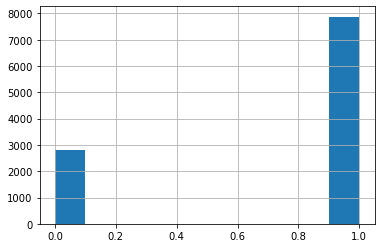

Resultado
0    26.3
1    73.7
dtype: float64

In [33]:
Dfe['Resultado'].hist()
plt.show()


round((Dfe.groupby(Dfe['Resultado']).size()/Dfe.shape[0])*100,1)


Hay que notar que los registros de estudiates que ganan materias estan relacionados aproximadamente 3 a 1 con respecto a los registros de estudinates que pierden

# APLICAR MODELO

**Transformación de los atributos del modelo**

In [37]:
# dt = pd.get_dummies(Dfe, columms = ["Genero"])
df = pd.get_dummies(Dfe[['Asignatura','Programa_est',
       'Circunscripcion', 'Genero', 'Estado_Civil', 'Estrato', 'Depart',
       'Caracter', 'Enfasis', 'Acceso_Internet', 'Portatil_PC',
       'Celular_Tablet', 'Grupo_Etnico', 'Con_Discapac', 'Orientac_Sex',
       'Desvin_Grup_Arm', 'Inmigrante', 'Embarazada', 'Tiene_Hijos',
       'Soltera_Cab_Fam', 'Consume_Sustan']],
       columns = ['Asignatura','Programa_est',
       'Circunscripcion', 'Genero', 'Estado_Civil', 'Estrato', 'Depart',
       'Caracter', 'Enfasis', 'Acceso_Internet', 'Portatil_PC',
       'Celular_Tablet', 'Grupo_Etnico', 'Con_Discapac', 'Orientac_Sex',
       'Desvin_Grup_Arm', 'Inmigrante', 'Embarazada', 'Tiene_Hijos',
       'Soltera_Cab_Fam', 'Consume_Sustan'], drop_first=True)

**Division de los datos**

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

x = df
y = Dfe['Resultado']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.15, random_state=42)

**NOTA:**  *Para medir los resultados de cada modelo se utilizara la metrica f1_score*

**Entrenamiento con Regresion Logistica**

In [132]:

clf = LogisticRegression()
clf.fit(X_train, y_train)


c:\Users\Wilmer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

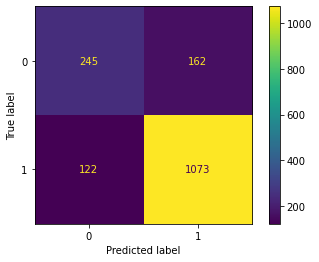

In [135]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

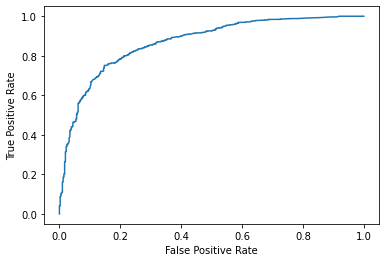

In [136]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

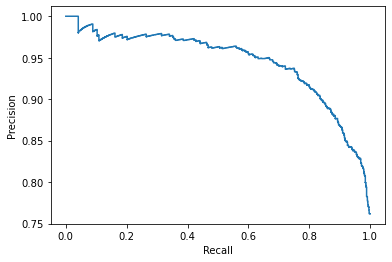

In [137]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

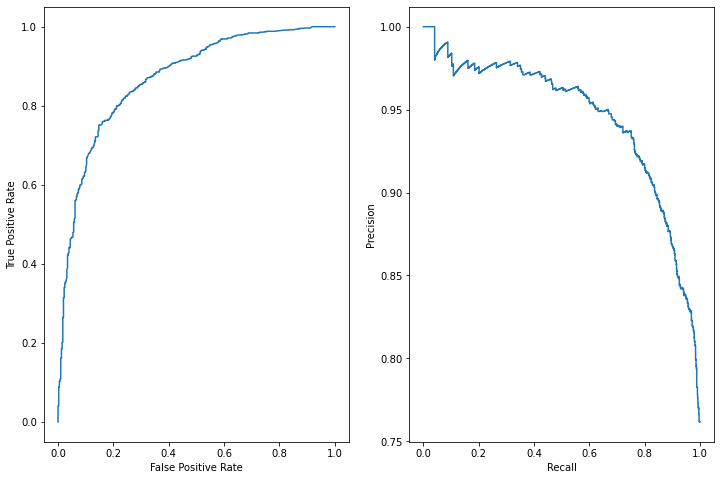

In [138]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

In [164]:
y_pred = clf.predict(X_test)
fi_score_model_log_regres = f1_score(y_test, y_pred)
fi_score_model_log_regres

0.8831275720164609

**Entrenamiento con Regresion Logistica con penalizacion**

In [165]:
l1_ratio = 0.5

for  C in (1, 0.1, 0.01, 3):
    
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga')
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01, solver='saga')
    clf_en_LR = LogisticRegression(C=C, penalty='elasticnet', solver='saga',l1_ratio=l1_ratio, tol=0.01)

    clf_l1_LR.fit(X_train, y_train)
    clf_l2_LR.fit(X_train, y_train)
    clf_en_LR.fit(X_train, y_train)

    y_pred1 = clf_l1_LR.predict(X_test)
    y_pred2 = clf_l2_LR.predict(X_test)
    y_pred3 = clf_en_LR.predict(X_test)

    print("Coeficiente de regularización C =", C)

    print("{:<40} {:.2f}".format("Score with L1 penalty:", f1_score(y_test, y_pred1)))
    print("{:<40} {:.2f}".format("Score with Elastic-Net penalty:",  f1_score(y_test, y_pred3)))
    print("{:<40} {:.2f}".format("Score with L2 penalty:", f1_score(y_test, y_pred2)),'\n')

Coeficiente de regularización C = 1
Score with L1 penalty:                   0.88
Score with Elastic-Net penalty:          0.88
Score with L2 penalty:                   0.88 

Coeficiente de regularización C = 0.1
Score with L1 penalty:                   0.88
Score with Elastic-Net penalty:          0.88
Score with L2 penalty:                   0.88 

Coeficiente de regularización C = 0.01
Score with L1 penalty:                   0.88
Score with Elastic-Net penalty:          0.87
Score with L2 penalty:                   0.87 

Coeficiente de regularización C = 3
Score with L1 penalty:                   0.89
Score with Elastic-Net penalty:          0.88
Score with L2 penalty:                   0.88 



Se escoge el modelo con los mejores hiper-parametros

In [166]:
C = 3

clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga')
clf_l1_LR.fit(X_train, y_train)

y_pred3 = clf_l1_LR.predict(X_test)

fi_score_model_log_regres_penal = f1_score(y_test, y_pred3)

print("{:<40} {:.2f}".format("Score with L2 penalty:", fi_score_model_log_regres_penal),'\n')

Score with L2 penalty:                   0.89 



**Entrenamiento con SVM**

In [167]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1000)
model.fit(X_train, y_train)

SVC(C=1000, kernel='linear')

In [169]:
y_pred_svm = model.predict(X_test)
fi_score_model_svm = round(f1_score(y_test, y_pred_svm),2)

fi_score_model_svm


0.88

**Entrenamiento con K-NN**

In [181]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(7)

classifier.fit(X_train,y_train)

pred_class= classifier.predict(X_test) 

fi_score_model_knn = round(f1_score(y_test, pred_class),2)
fi_score_model_knn

0.88

# Resultado de los tres modelos segun el f1_score

In [182]:
print('RESULTADOS')

print("{:<40} {:.2f}".format("F1_score Regresion Logistica:",fi_score_model_log_regres))
print("{:<40} {:.2f}".format("F1_score Regresion Logistica L1 penalty:", fi_score_model_log_regres_penal))
print("{:<40} {:.2f}".format("F1_score SVM:", fi_score_model_svm))
print("{:<40} {:.2f}".format("F1_score KNN:", fi_score_model_knn))


RESULTADOS
F1_score Regresion Logistica:            0.88
F1_score Regresion Logistica L1 penalty: 0.89
F1_score SVM:                            0.88
F1_score KNN:                            0.88
